In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Rainfall analysis - How to test a feeling

I was whatsapping with a friend of mine the other day, and when it comes with people you don't listen for a while, we made a comment about the weather. Mine was "is going to be a dry year, there has been so few rainy day that I am expecting a drought this year". They immediately replaied with "Puglia, Italy, has always had a higher quantity of rainfall with respect to London" before commenting about the weather in the region where they are currently living. And yes, I really enjoy and value having nerds friends.

Later that day, I started researching about rainfall data in London, South of England, Puglia and South of Italy to verify if my feeling was true or just a feeling, and I stumbled to the core question: "how can I demontrate a feeling?" No surprise, I had to shift to a more mundane "how I test a feeling?". In the next section of this notebook, I will discuss some findings about my research.

In [2]:
data = pd.read_csv('./data/south_east_rainfall.csv',
                   sep=',')

data.columns = data.columns.str.strip()
string_columns = data.select_dtypes(include=['object']).columns
data[string_columns] = data[string_columns].apply(pd.to_numeric, errors='coerce')
data_melt = data[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']].melt(id_vars='year',var_name='month', value_name='value').sort_values(by='year')
data_melt['month'] = pd.Categorical(data_melt['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
data_melt.rename(columns={'value': 'rainfall'}, inplace=True)

In [3]:
data_melt.head()

,year,month,rainfall
0,1836,jan,63.0
570,1836,apr,69.7
380,1836,mar,103.6
1330,1836,aug,43.3
1900,1836,nov,121.3


In [4]:
rainfall_south_east = data_melt[data_melt['year'] >= 2010].copy().reset_index(drop=True)
rainfall_south_east.shape

(192, 3)

In [5]:
rainfall_south_east.head()

,year,month,rainfall
0,2010,nov,71.3
1,2010,aug,109.7
2,2010,jul,42.0
3,2010,apr,23.9
4,2010,may,32.3


In [9]:
(rainfall_south_east[rainfall_south_east['year'] < 2024]
 .groupby('month', observed=True)['rainfall']
 .mean()
 .sort_values()
 .head(5)
 )


month
apr    42.035714
may    53.292857
jul    57.192857
mar    57.607143
sep    57.835714
Name: rainfall, dtype: float64

In [11]:
data_melt

,year,month,rainfall
0,1836,jan,63.0
570,1836,apr,69.7
380,1836,mar,103.6
1330,1836,aug,43.3
1900,1836,nov,121.3
...,...,...,...
569,2025,mar,8.8
379,2025,feb,56.8
189,2025,jan,98.2
2089,2025,nov,NaN


In [13]:
yearly_aggregate = (data_melt
                    .groupby(['year'])
                    .agg(
                        mean_value=('rainfall', 'mean'),
                        median_value=('rainfall', 'median'),
                        std_value=('rainfall', 'std'),
                        min_value=('rainfall', 'min'),
                        max_value=('rainfall', 'max')
                        )
                        ).reset_index()
yearly_aggregate.head()

,year,mean_value,median_value,std_value,min_value,max_value
0,1836,68.625000,61.80,29.269380,16.1,121.3
1,1837,56.933333,56.80,20.707106,23.3,93.1
2,1838,58.591667,53.85,26.424591,19.6,119.1
3,1839,73.933333,72.45,30.584320,27.5,116.3
4,1840,50.875000,49.90,31.935478,7.9,119.7


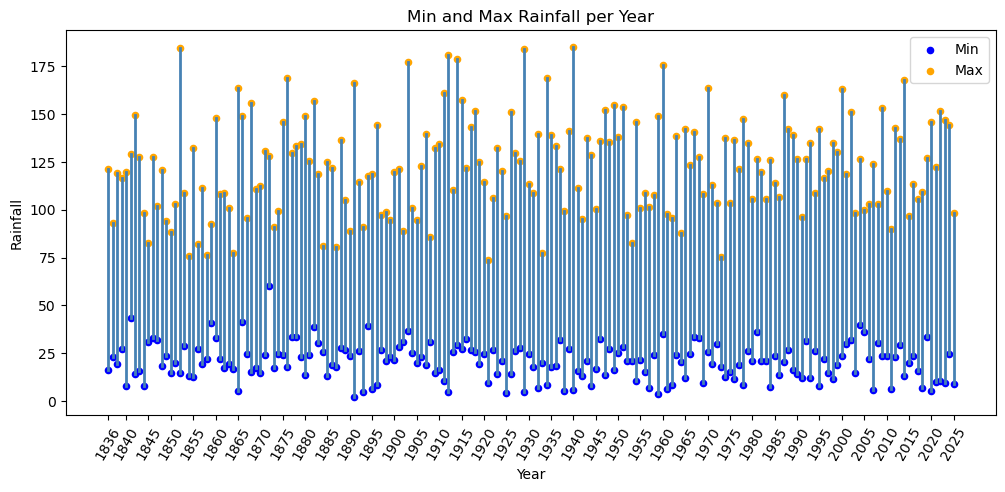

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))

# Plot vertical bars (lines) connecting min and max
for idx, row in yearly_aggregate.iterrows():
    ax.plot([row['year'], row['year']], [row['min_value'], row['max_value']], color='steelblue', linewidth=2);
    ax.scatter([row['year']], [row['min_value']], color='blue', s = 20, label='Min' if idx == 0 else "");
    ax.scatter([row['year']], [row['max_value']], color='orange', s = 20, label='Max' if idx == 0 else "");

# Labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.set_title('Min and Max Rainfall per Year')
ax.legend()

start_year = yearly_aggregate['year'].min()
end_year = yearly_aggregate['year'].max()

# Generate ticks: start at 1836, go every 5 years, include last year if needed
# xticks = list(np.arange(start_year, end_year + 1, 5));
xticks = [1836] + list(np.arange(1840, 2030, 5));
if end_year not in xticks:
    xticks.append(end_year);

plt.xticks(xticks, rotation=60);

# plt.xticks(yearly_aggregate['year'], rotation = 60);  # Ensure all years are shown on x-axis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


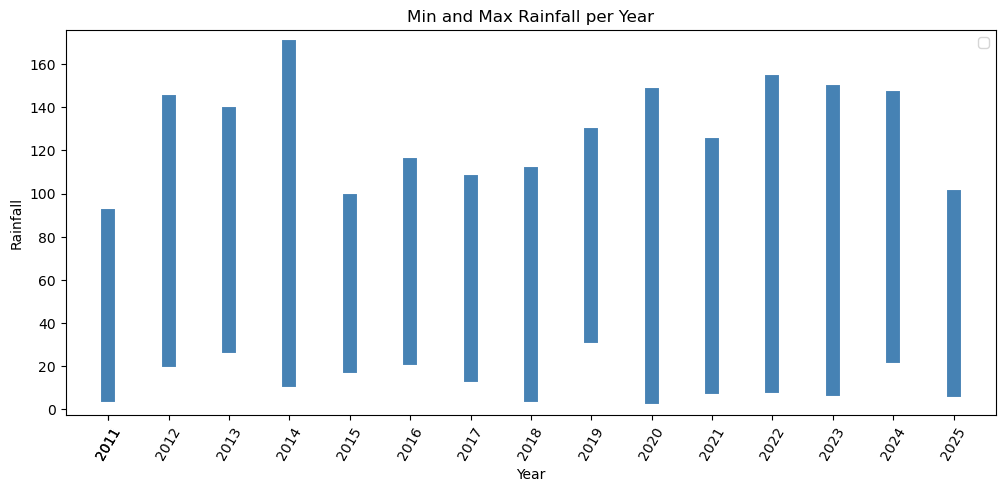

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))

yearly_aggregate_2010 = yearly_aggregate[yearly_aggregate['year'] > 2010]
# Plot vertical bars (lines) connecting min and max
for idx, row in yearly_aggregate_2010.iterrows():
    ax.plot([row['year'], row['year']], [row['min_value'], row['max_value']], color='steelblue', linewidth=10);
    #ax.scatter([row['year']], [row['min_value']], color='blue', s = 300, label='Min' if idx == 0 else "");
    #ax.scatter([row['year']], [row['max_value']], color='orange', s = 300, label='Max' if idx == 0 else "");

# Labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.set_title('Min and Max Rainfall per Year')
ax.legend()

start_year = yearly_aggregate_2010['year'].min()
end_year = yearly_aggregate_2010['year'].max()

# Generate ticks: start at 1836, go every 5 years, include last year if needed
xticks = list(np.arange(start_year, end_year + 1));
xticks = [yearly_aggregate_2010['year'].min()] + list(np.arange(yearly_aggregate_2010['year'].min(),yearly_aggregate_2010['year'].max()));
if end_year not in xticks:
    xticks.append(end_year);

plt.xticks(xticks, rotation=60);

# plt.xticks(yearly_aggregate['year'], rotation = 60);  # Ensure all years are shown on x-axis

In [22]:
yearly_aggregate_2010

,year,mean_value,median_value,std_value,min_value,max_value
175,2011,50.208333,48.60,24.767261,6.5,89.8
176,2012,87.200000,92.85,43.679369,23.0,142.6
177,2013,64.966667,57.60,33.527745,29.4,136.9
178,2014,79.933333,74.95,43.660037,13.4,167.7
179,2015,62.466667,60.70,24.861081,20.2,96.7
180,2016,62.208333,57.50,28.887004,23.8,113.2
181,2017,61.800000,61.75,23.325094,16.0,105.4
182,2018,62.625000,61.10,29.881436,6.8,109.2
183,2019,74.408333,66.55,34.750316,33.8,127.2
184,2020,76.075000,65.05,45.567974,5.5,145.9


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Sample data
# data = {
#     'year': [1983, 1984, 1985],
#     'min': [3, 2, 4],
#     'max': [8, 9, 10]
# }
# df = pd.DataFrame(data)

# # Plot
# fig, ax = plt.subplots(figsize=(8, 5))

# # Plot vertical bars (lines) connecting min and max
# for idx, row in df.iterrows():
#     ax.plot([row['year'], row['year']], [row['min'], row['max']], color='blue', linewidth=2)
#     ax.scatter([row['year']], [row['min']], color='green', label='Min' if idx == 0 else "")
#     ax.scatter([row['year']], [row['max']], color='red', label='Max' if idx == 0 else "")

# # Labels and legend
# ax.set_xlabel('Year')
# ax.set_ylabel('Rainfall')
# ax.set_title('Min and Max Rainfall per Year')
# ax.legend()
# plt.xticks(df['year'])  # Ensure all years are shown on x-axis
# plt.tight_layout()
# plt.show()

In [ ]:

data.head()

In [ ]:
data.dtypes

In [ ]:
# For specific columns only
string_columns = data.select_dtypes(include=['object']).columns
string_columns
# df[string_columns] = df[string_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:

data.head()

In [ ]:
data_melt = data[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']].melt(id_vars='year',var_name='month', value_name='value').sort_values(by='year')
data_melt.head()

In [ ]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    

In [ ]:
data_melt['month'] = pd.Categorical(data_melt['month'], categories=months, ordered=True)

In [ ]:
data_melt.sort_values(by=['year', 'month'], inplace=True)
data_melt.head()

In [ ]:
conds=[
    data_melt['month'].isin(['mar', 'apr', 'may']),
    data_melt['month'].isin(['jun', 'jul', 'aug']),
    data_melt['month'].isin(['sep', 'oct', 'nov']),
    data_melt['month'].isin(['dec', 'jan', 'feb'])
]
choices=['spring', 'summer', 'autumn', 'winter']
data_melt['season'] = np.select(conds, choices, default='unknown')

In [ ]:
# Define decade bins
bins = list(range(1830, 2040, 10))  # Adjust range as needed
labels = [f"{year}s" for year in bins[:-1]]
num_labels = [year for year in bins[:-1]]

In [ ]:
data_melt['decade'] = pd.cut(data_melt['year'],
                        bins=bins,
                        labels=labels,
                        right=False)


In [ ]:
data_melt['decade num'] = pd.cut(data_melt['year'],
                        bins=bins,
                        labels=num_labels,
                        right=False)

In [ ]:
data_melt.head()

In [ ]:
rainfall_decade_season = (data_melt
 .groupby(['decade num', 'season'])
 .agg(mean_value=('value', 'mean'),
      median_value=('value', 'median'),
      std_value=('value', 'std'),
      min_value=('value', 'min'),
      max_value=('value', 'max')
 )
 .reset_index()
)

In [ ]:
rainfall_decade_season.head()

In [ ]:
sns.lmplot(data=rainfall_decade_season, 
           x='decade num', 
           y='mean_value', 
           hue='season', 
           height=6, aspect=1.2)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.lmplot(data=rainfall_decade_season, 
           x='decade num', 
           y='std_value', 
           hue='season', 
           height=6, aspect=1.2)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.lmplot(data=rainfall_decade_season, 
           x='decade num', 
           y='max_value', 
           hue='season', 
           height=6, aspect=1.2)
plt.xticks(rotation=45)
plt.show()

In [ ]:
rainfall_per_year = (data_melt
                     .groupby('year')
                     .agg(mean_value=('value', 'mean'),
                          median_value=('value', 'median'),
                          std_value=('value', 'std'),
                          min_value=('value', 'min'),
                          max_value=('value', 'max')
                          )
                          ).reset_index()
rainfall_per_year

### Dataset

### MuZiK